In [1]:
using DelimitedFiles, FileIO
using Plots, Rsvg, LaTeXStrings
using Chemfiles, JUMD, NamedArrays
using LinearAlgebra, Statistics
home_10 = "/home/pbarletta/labo/20/bisana/run/10_4ake-2eck"
rtdos = "/home/pbarletta/labo/20/bisana/rtdos_log"

"/home/pbarletta/labo/20/bisana/rtdos_log"

In [2]:
flx_5 = convert(Array{Float64, 1}, readdlm(joinpath(home_10, "ndd", "flx_5"))[:, 2])
vol = convert(Array{Float64, 1}, readdlm(joinpath(home_10, "ndd", "vol"))[:, 2]);

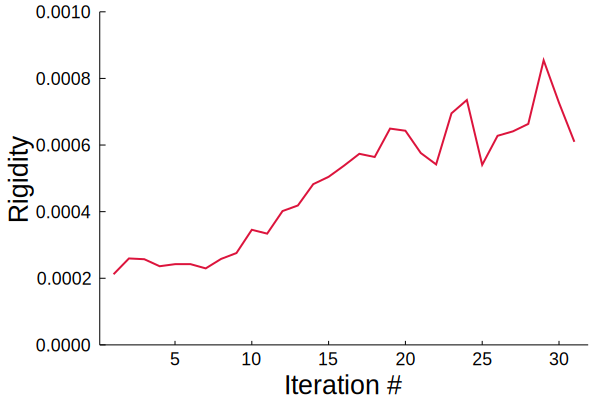

In [21]:
plt_flx = plot(flx_5,
    legend = false, linewidth = 2, grid = false,
    linecolor = Colors.colorant"Crimson",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"), yrange = (0, 1E-3),
#     title = string("Rigidez a c/ paso"),
    yaxis = "Rigidity", xaxis = "Iteration #")

In [22]:
savefig(plt_flx, joinpath(rtdos, string("flx_4ake-2eck", ".svg")))

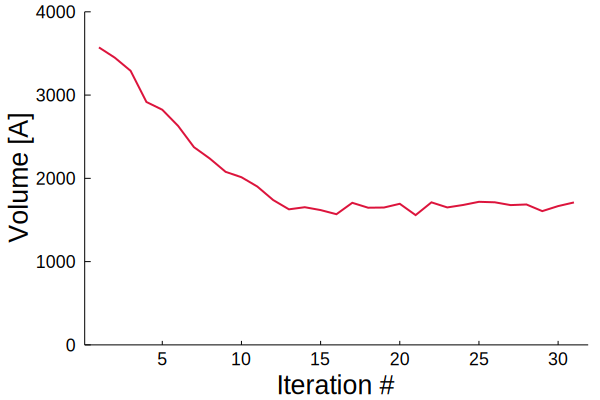

In [20]:
plt_vol = plot(vol,
    legend = false, linewidth = 2, yrange = (0, 4000), grid = false,
    linecolor = Colors.colorant"Crimson",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
#     title = string("Volumen a c/ paso"),
    yaxis = "Volume [A]", xaxis = "Iteration #")

In [23]:
savefig(plt_vol, joinpath(rtdos, string("vol_4ake-2eck", ".svg")))